# Portfolio Backtesting for Momentum Screener and Value Screener Projects

Helen Nguyen

Pomona College 2024

I will backtest the two strategies by calculating the cumulative return of the portfolio and compare it to the SPDR S&P 500 trust benchmark to assess the effectiveness of my trading models using historical data from 01/01/2021 to 12/31/2021.

## Import Modules & Packages

In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from functools import reduce

## Prepare to Get Historical Data from 01/01/2021 to 12/31/2021

In [3]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 12, 31)

Benchmark SPY for comparison.

In [4]:
SPY = web.DataReader('SPY','yahoo',start,end)
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,375.450012,364.820007,375.309998,368.790009,110210800.0,362.811676
2021-01-05,372.500000,368.049988,368.100006,371.329987,66426200.0,365.310455
2021-01-06,376.980011,369.119995,369.709991,373.549988,107997700.0,367.494446
2021-01-07,379.899994,375.910004,376.100006,379.100006,68766800.0,372.954559
2021-01-08,381.489990,377.100006,380.589996,381.260010,71677200.0,375.079498
...,...,...,...,...,...,...
2021-12-27,477.309998,472.010010,472.059998,477.260010,56808600.0,475.781921
2021-12-28,478.809998,476.059998,477.720001,476.869995,47274600.0,475.393127
2021-12-29,478.559998,475.920013,476.980011,477.480011,54503000.0,476.001251


While closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings. Since the adjusted closing price begins where the closing price ends, it can be called a more accurate measure of stocks' value.

In [5]:
# daily returns
SPY_ret = SPY.pct_change()[1:]

# cumulative returns
SPY_cum_ret = (SPY_ret + 1).cumprod()

SPY_cum_ret['Adj Close']

Date
2021-01-05    1.006887
2021-01-06    1.012907
2021-01-07    1.027956
2021-01-08    1.033813
2021-01-11    1.026844
                ...   
2021-12-27    1.311374
2021-12-28    1.310303
2021-12-29    1.311979
2021-12-30    1.308352
2021-12-31    1.305055
Name: Adj Close, Length: 251, dtype: float64

In [6]:
def get_stock(ticker):
    data = web.DataReader(f"{ticker}","yahoo",start,end)
    data[f'{ticker}'] = data['Adj Close']
    data = data[[f'{ticker}']] 
    return data 

In [7]:
def combine_stocks(tickers):
    data_frames = []
    for i in tickers:
        try:
            data_frames.append(get_stock(i))
        except:
            pass
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    return df_merged

## Backtest for Momentum Strategy

In [8]:
stocks_momentum = pd.read_csv('momentum_strategy.csv')
stocks_momentum

,Ticker,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
0,MRO,$22.60,88495,149.1%,9980.2%,100.3%,9960.4%,36.8%,9980.2%,13.0%,9841.6%,99
1,HAL,$33.21,60222,66.8%,9782.2%,74.1%,9881.2%,42.4%,10000.0%,13.1%,9861.4%,99
2,DVN,$55.65,35938,185.8%,10000.0%,119.9%,10000.0%,29.4%,9881.2%,9.0%,9524.8%,99
3,PXD,$244.53,8178,85.2%,9861.4%,71.5%,9841.6%,32.9%,9960.4%,8.3%,9445.5%,98
4,OXY,$39.68,50403,59.1%,9584.2%,69.5%,9821.8%,30.4%,9920.8%,10.1%,9703.0%,98
5,EOG,$114.96,17397,96.2%,9920.8%,80.1%,9901.0%,29.8%,9901.0%,5.8%,9089.1%,97
6,SLB,$41.02,48756,61.4%,9683.2%,52.1%,9762.4%,27.3%,9861.4%,7.7%,9346.5%,97
7,FANG,$132.20,15128,110.3%,9940.6%,93.5%,9920.8%,22.2%,9623.8%,4.6%,8871.3%,96
8,XOM,$77.50,25806,57.8%,9544.6%,46.0%,9663.4%,23.0%,9722.8%,7.3%,9306.9%,96
9,MCK,$276.38,7236,56.3%,9485.1%,36.9%,9505.0%,20.9%,9584.2%,7.6%,9326.7%,95


In [9]:
stocks_momentum['Price (float)'] = stocks_momentum['Price'].str.replace('$', '').astype(float)
stocks_momentum

<ipython-input-9-211d545c6fde>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  stocks_momentum['Price (float)'] = stocks_momentum['Price'].str.replace('$', '').astype(float)


,Ticker,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score,Price (float)
0,MRO,$22.60,88495,149.1%,9980.2%,100.3%,9960.4%,36.8%,9980.2%,13.0%,9841.6%,99,22.60
1,HAL,$33.21,60222,66.8%,9782.2%,74.1%,9881.2%,42.4%,10000.0%,13.1%,9861.4%,99,33.21
2,DVN,$55.65,35938,185.8%,10000.0%,119.9%,10000.0%,29.4%,9881.2%,9.0%,9524.8%,99,55.65
3,PXD,$244.53,8178,85.2%,9861.4%,71.5%,9841.6%,32.9%,9960.4%,8.3%,9445.5%,98,244.53
4,OXY,$39.68,50403,59.1%,9584.2%,69.5%,9821.8%,30.4%,9920.8%,10.1%,9703.0%,98,39.68
5,EOG,$114.96,17397,96.2%,9920.8%,80.1%,9901.0%,29.8%,9901.0%,5.8%,9089.1%,97,114.96
6,SLB,$41.02,48756,61.4%,9683.2%,52.1%,9762.4%,27.3%,9861.4%,7.7%,9346.5%,97,41.02
7,FANG,$132.20,15128,110.3%,9940.6%,93.5%,9920.8%,22.2%,9623.8%,4.6%,8871.3%,96,132.20
8,XOM,$77.50,25806,57.8%,9544.6%,46.0%,9663.4%,23.0%,9722.8%,7.3%,9306.9%,96,77.50
9,MCK,$276.38,7236,56.3%,9485.1%,36.9%,9505.0%,20.9%,9584.2%,7.6%,9326.7%,95,276.38


### Asset Weights

In [10]:
wts_momentum = (stocks_momentum['Number of Shares to Buy'] * stocks_momentum['Price (float)']) / 100000000 
# 100000000 was the input value for our portfolio in the original project

wts_momentum = wts_momentum.tolist()
wts_momentum

[0.019999870000000003,
 0.0199997262,
 0.019999496999999998,
 0.0199976634,
 0.0199999104,
 0.0199995912,
 0.019999711200000003,
 0.019999216,
 0.01999965,
 0.0199988568,
 0.019999163799999997,
 0.01999991,
 0.019999231,
 0.0199993593,
 0.019999498799999998,
 0.0199999263,
 0.0199988583,
 0.0199994672,
 0.019999615499999998,
 0.019999730799999997,
 0.0199994344,
 0.019999194799999998,
 0.019999961599999998,
 0.01999858,
 0.0199993409,
 0.019999826000000002,
 0.019999044,
 0.019999798,
 0.019999605599999998,
 0.0199999488,
 0.0199997586,
 0.0199998708,
 0.019999896500000003,
 0.0199995165,
 0.0199998135,
 0.0199993948,
 0.0199999839,
 0.019998789,
 0.019999496999999998,
 0.0199998251,
 0.01999982,
 0.0199991392,
 0.019999811699999998,
 0.0199986087,
 0.019999221600000002,
 0.019999755999999997,
 0.019999472,
 0.0199996935,
 0.0199999573,
 0.019999934100000002]

In [11]:
portfolio_momentum = combine_stocks(stocks_momentum['Ticker'].tolist())
portfolio_momentum

,MRO,HAL,DVN,PXD,OXY,EOG,SLB,FANG,XOM,MCK,...,CTRA,HSY,FOXA,RE,MTB,WMB,MET,LYV,HPE,HST
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,6.709444,18.610807,14.937768,107.134392,17.384007,46.585911,21.505861,47.511826,38.667282,172.556458,...,15.529181,147.243179,28.304615,221.531250,122.261932,18.620798,44.318222,70.669998,11.126261,14.128582
2021-01-05,7.318499,20.172415,16.076857,114.564316,19.137350,50.379303,22.661983,52.103794,40.530769,173.713913,...,15.678859,147.077301,28.928476,219.705475,123.871918,19.185904,44.866432,72.000000,11.328208,13.928885
2021-01-06,7.367617,20.577641,16.965897,119.294167,19.924364,51.444447,23.916084,54.676468,41.564999,177.008133,...,15.968863,147.594437,31.448481,232.728729,134.785049,19.917767,47.540146,72.620003,11.578238,14.727674
2021-01-07,7.554264,20.113113,17.197418,124.609367,20.492210,54.770676,24.376574,55.132751,41.891113,181.054214,...,16.296284,147.506622,30.397255,234.399139,142.246872,19.954826,47.684406,73.010002,11.510921,14.657781
2021-01-08,7.416734,19.885790,16.771418,123.901299,20.004061,55.004261,24.337385,55.103622,42.356979,181.578522,...,16.155964,148.345810,29.562162,232.078033,139.055862,19.732489,47.520908,73.459999,11.424375,14.697721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,16.505346,23.087076,43.873497,182.044556,29.569427,89.345154,29.747375,110.652084,61.211414,244.921265,...,19.590004,189.035782,37.105877,269.674500,152.424362,25.916601,62.055225,120.190002,15.803299,17.453543
2021-12-28,16.425610,22.967506,43.765312,180.123856,29.409809,88.794006,30.016539,109.676392,61.013607,246.069321,...,19.639198,190.120926,37.274902,272.667358,153.129486,25.817907,62.174389,120.089996,15.852933,17.453543
2021-12-29,16.515314,22.857901,43.470264,179.878860,29.190332,88.429855,29.557964,108.232750,60.479530,248.035950,...,19.688396,190.967163,36.877197,274.626129,153.040115,25.699478,62.243904,119.830002,15.952199,17.453543


### Daily Returns

In [12]:
portfolio_momentum_ret = portfolio_momentum.pct_change()[1:]
portfolio_momentum_ret

,MRO,HAL,DVN,PXD,OXY,EOG,SLB,FANG,XOM,MCK,...,CTRA,HSY,FOXA,RE,MTB,WMB,MET,LYV,HPE,HST
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.090776,0.083909,0.076256,0.069351,0.100860,0.081428,0.053758,0.096649,0.048193,0.006708,...,0.009639,-0.001127,0.022041,-0.008242,0.013168,0.030348,0.012370,0.018820,0.018151,-0.014134
2021-01-06,0.006711,0.020088,0.055299,0.041286,0.041125,0.021142,0.055339,0.049376,0.025517,0.018963,...,0.018497,0.003516,0.087112,0.059276,0.088100,0.038146,0.059593,0.008611,0.022071,0.057348
2021-01-07,0.025333,-0.022574,0.013646,0.044555,0.028500,0.064657,0.019254,0.008345,0.007846,0.022858,...,0.020504,-0.000595,-0.033427,0.007177,0.055361,0.001861,0.003034,0.005370,-0.005814,-0.004746
2021-01-08,-0.018206,-0.011302,-0.024771,-0.005682,-0.023821,0.004265,-0.001608,-0.000528,0.011121,0.002896,...,-0.008611,0.005689,-0.027473,-0.009902,-0.022433,-0.011142,-0.003429,0.006163,-0.007519,0.002725
2021-01-11,0.011921,0.022366,0.012148,0.001372,0.000000,0.012570,0.006039,0.027132,0.030356,-0.000817,...,0.044586,-0.012629,0.007976,-0.007197,0.017055,0.009859,-0.000202,-0.016608,0.007576,-0.023777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.035000,0.020255,0.060880,0.031884,0.027383,0.041294,0.009131,0.049084,0.014258,0.018938,...,0.026818,0.007535,0.001073,0.015729,0.016760,0.015861,0.011492,0.013919,0.010152,0.007493
2021-12-28,-0.004831,-0.005179,-0.002466,-0.010551,-0.005398,-0.006169,0.009048,-0.008818,-0.003232,0.004687,...,0.002511,0.005740,0.004555,0.011098,0.004626,-0.003808,0.001920,-0.000832,0.003141,0.000000
2021-12-29,0.005461,-0.004772,-0.006742,-0.001360,-0.007463,-0.004101,-0.015277,-0.013163,-0.008753,0.007992,...,0.002505,0.004451,-0.010670,0.007184,-0.000584,-0.004587,0.001118,-0.002165,0.006262,0.000000


### Weighted Average of Returns

In [13]:
portfolio_momentum_wtd_ret = (wts_momentum * portfolio_momentum_ret)
portfolio_momentum_wtd_ret

,MRO,HAL,DVN,PXD,OXY,EOG,SLB,FANG,XOM,MCK,...,CTRA,HSY,FOXA,RE,MTB,WMB,MET,LYV,HPE,HST
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.001816,0.001678,0.001525,0.001387,0.002017,0.001629,0.001075,0.001933,0.000964,0.000134,...,0.000193,-0.000023,0.000441,-0.000165,0.000263,0.000607,0.000247,0.000376,0.000363,-0.000283
2021-01-06,0.000134,0.000402,0.001106,0.000826,0.000822,0.000423,0.001107,0.000987,0.000510,0.000379,...,0.000370,0.000070,0.001742,0.001185,0.001762,0.000763,0.001192,0.000172,0.000441,0.001147
2021-01-07,0.000507,-0.000451,0.000273,0.000891,0.000570,0.001293,0.000385,0.000167,0.000157,0.000457,...,0.000410,-0.000012,-0.000669,0.000144,0.001107,0.000037,0.000061,0.000107,-0.000116,-0.000095
2021-01-08,-0.000364,-0.000226,-0.000495,-0.000114,-0.000476,0.000085,-0.000032,-0.000011,0.000222,0.000058,...,-0.000172,0.000114,-0.000549,-0.000198,-0.000449,-0.000223,-0.000069,0.000123,-0.000150,0.000054
2021-01-11,0.000238,0.000447,0.000243,0.000027,0.000000,0.000251,0.000121,0.000543,0.000607,-0.000016,...,0.000892,-0.000253,0.000160,-0.000144,0.000341,0.000197,-0.000004,-0.000332,0.000152,-0.000476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.000700,0.000405,0.001218,0.000638,0.000548,0.000826,0.000183,0.000982,0.000285,0.000379,...,0.000536,0.000151,0.000021,0.000315,0.000335,0.000317,0.000230,0.000278,0.000203,0.000150
2021-12-28,-0.000097,-0.000104,-0.000049,-0.000211,-0.000108,-0.000123,0.000181,-0.000176,-0.000065,0.000094,...,0.000050,0.000115,0.000091,0.000222,0.000093,-0.000076,0.000038,-0.000017,0.000063,0.000000
2021-12-29,0.000109,-0.000095,-0.000135,-0.000027,-0.000149,-0.000082,-0.000306,-0.000263,-0.000175,0.000160,...,0.000050,0.000089,-0.000213,0.000144,-0.000012,-0.000092,0.000022,-0.000043,0.000125,0.000000


### Portfolio Returns

as the sum of the weighted returns

In [14]:
portfolio_momentum_ret = portfolio_momentum_wtd_ret.sum(axis=1) # add the rows
portfolio_momentum_ret

Date
2021-01-05    0.028555
2021-01-06    0.043392
2021-01-07    0.010794
2021-01-08   -0.007349
2021-01-11    0.003630
                ...   
2021-12-27    0.018141
2021-12-28    0.001303
2021-12-29   -0.000205
2021-12-30   -0.005234
2021-12-31   -0.000114
Length: 251, dtype: float64

### Cumulative Returns

In [15]:
cum_ret_momentum = (portfolio_momentum_ret + 1).cumprod()
cum_ret_momentum

Date
2021-01-05    1.028555
2021-01-06    1.073186
2021-01-07    1.084770
2021-01-08    1.076797
2021-01-11    1.080707
                ...   
2021-12-27    1.554707
2021-12-28    1.556733
2021-12-29    1.556414
2021-12-30    1.548268
2021-12-31    1.548092
Length: 251, dtype: float64

### Plot Portfolio Cumulative Returns for Momentum Strategy

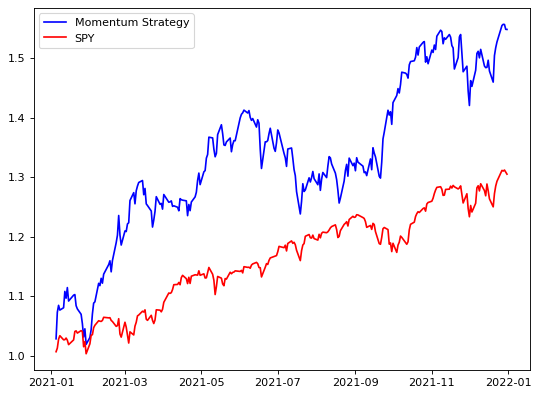

In [16]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cum_ret_momentum, color='blue', label='Momentum Strategy')
plt.plot(SPY_cum_ret['Adj Close'], color='red', label='SPY')
plt.legend()
plt.show()

Our portfolio built from momentum strategy has consistently led to better cumulative returns, relative to SPY from 01/01/2021 to 12/31/2021.

## Backtest for Value Investing Strategy

In [17]:
stocks_value = pd.read_csv('value_strategy.csv')
stocks_value

,Ticker,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score
0,NVDA,$246.94,8099.0,75,9584.2%,26,9604.0%,25,9960.4%,62,9782.2%,37,9980.2%,9782.2%
1,MPWR,$462.16,4327.0,107,9782.2%,19,9386.1%,20,9901.0%,79,9901.0%,32,9940.6%,9782.2%
2,FTNT,$311.03,6430.0,92,9683.2%,45,9821.8%,17,9782.2%,73,9881.2%,21,9643.6%,9762.4%
3,TECH,$418.30,4781.0,81,9643.6%,10,8534.7%,16,9762.4%,43,9643.6%,22,9762.4%,9469.3%
4,TYL,$426.54,4688.0,109,9802.0%,8,8237.6%,12,9485.1%,82,9920.8%,28,9881.2%,9465.3%
5,TSLA,$858.37,2329.0,91,9663.4%,15,9168.3%,8,8891.1%,45,9663.4%,31,9920.8%,9461.4%
6,MKTX,$390.27,5124.0,52,9049.5%,14,9039.6%,21,9940.6%,35,9445.5%,20,9584.2%,9411.9%
7,BKNG,$2621.97,762.0,283,9980.2%,20,9445.5%,12,9505.0%,55,9762.4%,12,8356.4%,9409.9%
8,INTU,$483.10,4139.0,64,9505.0%,14,9069.3%,13,9604.0%,47,9742.6%,15,9069.3%,9398.0%
9,ABMD,$301.22,6639.0,103,9742.6%,10,8514.9%,14,9643.6%,47,9722.8%,16,9148.5%,9354.5%


In [18]:
stocks_value['Price (float)'] = stocks_value['Price'].str.replace('$', '').astype(float)
stocks_value = stocks_value.dropna()
stocks_value

<ipython-input-18-afdec4cfca62>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  stocks_value['Price (float)'] = stocks_value['Price'].str.replace('$', '').astype(float)


,Ticker,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score,Price (float)
0,NVDA,$246.94,8099.0,75,9584.2%,26,9604.0%,25,9960.4%,62,9782.2%,37,9980.2%,9782.2%,246.94
1,MPWR,$462.16,4327.0,107,9782.2%,19,9386.1%,20,9901.0%,79,9901.0%,32,9940.6%,9782.2%,462.16
2,FTNT,$311.03,6430.0,92,9683.2%,45,9821.8%,17,9782.2%,73,9881.2%,21,9643.6%,9762.4%,311.03
3,TECH,$418.30,4781.0,81,9643.6%,10,8534.7%,16,9762.4%,43,9643.6%,22,9762.4%,9469.3%,418.30
4,TYL,$426.54,4688.0,109,9802.0%,8,8237.6%,12,9485.1%,82,9920.8%,28,9881.2%,9465.3%,426.54
5,TSLA,$858.37,2329.0,91,9663.4%,15,9168.3%,8,8891.1%,45,9663.4%,31,9920.8%,9461.4%,858.37
6,MKTX,$390.27,5124.0,52,9049.5%,14,9039.6%,21,9940.6%,35,9445.5%,20,9584.2%,9411.9%,390.27
7,BKNG,$2621.97,762.0,283,9980.2%,20,9445.5%,12,9505.0%,55,9762.4%,12,8356.4%,9409.9%,2621.97
8,INTU,$483.10,4139.0,64,9505.0%,14,9069.3%,13,9604.0%,47,9742.6%,15,9069.3%,9398.0%,483.10
9,ABMD,$301.22,6639.0,103,9742.6%,10,8514.9%,14,9643.6%,47,9722.8%,16,9148.5%,9354.5%,301.22


In [19]:
stocks_value = stocks_value.set_index('Ticker')
stocks_value

,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score,Price (float)
Ticker,,,,,,,,,,,,,,
NVDA,$246.94,8099.0,75,9584.2%,26,9604.0%,25,9960.4%,62,9782.2%,37,9980.2%,9782.2%,246.94
MPWR,$462.16,4327.0,107,9782.2%,19,9386.1%,20,9901.0%,79,9901.0%,32,9940.6%,9782.2%,462.16
FTNT,$311.03,6430.0,92,9683.2%,45,9821.8%,17,9782.2%,73,9881.2%,21,9643.6%,9762.4%,311.03
TECH,$418.30,4781.0,81,9643.6%,10,8534.7%,16,9762.4%,43,9643.6%,22,9762.4%,9469.3%,418.30
TYL,$426.54,4688.0,109,9802.0%,8,8237.6%,12,9485.1%,82,9920.8%,28,9881.2%,9465.3%,426.54
TSLA,$858.37,2329.0,91,9663.4%,15,9168.3%,8,8891.1%,45,9663.4%,31,9920.8%,9461.4%,858.37
MKTX,$390.27,5124.0,52,9049.5%,14,9039.6%,21,9940.6%,35,9445.5%,20,9584.2%,9411.9%,390.27
BKNG,$2621.97,762.0,283,9980.2%,20,9445.5%,12,9505.0%,55,9762.4%,12,8356.4%,9409.9%,2621.97
INTU,$483.10,4139.0,64,9505.0%,14,9069.3%,13,9604.0%,47,9742.6%,15,9069.3%,9398.0%,483.10


In [20]:
portfolio_value = combine_stocks(stocks_value.index.tolist())
portfolio_value

,NVDA,MPWR,FTNT,TECH,TYL,TSLA,MKTX,BKNG,INTU,ABMD,...,GNRC,CRM,JKHY,MCO,NKE,KO,ROP,STE,ADI,CME
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,130.998230,362.180328,145.559998,313.454987,431.609985,729.770020,558.549622,2164.080078,368.734100,316.730011,...,224.559998,220.309998,156.376801,289.203369,138.737808,50.758957,416.293549,186.599472,142.928177,173.012451
2021-01-05,133.907700,367.878784,141.740005,315.826202,432.239990,735.109985,550.083740,2188.070068,365.926666,322.600006,...,227.979996,221.520004,156.820328,281.656342,139.856827,50.200962,415.926422,189.896072,145.482910,172.838730
2021-01-06,126.013451,356.005310,138.110001,329.684723,433.730011,755.979980,540.982605,2249.810059,358.119446,321.609985,...,246.289993,216.149994,159.166077,278.655334,140.965942,48.603916,420.113647,193.281784,146.138733,186.598663
2021-01-07,133.300842,378.491425,143.250000,334.606415,437.670013,816.039978,545.081604,2239.850098,365.688568,323.559998,...,254.500000,217.979996,162.566422,278.685089,143.540649,48.065155,427.806244,197.786118,152.315094,191.838257
2021-01-08,132.629028,384.606873,148.139999,328.299866,436.390015,880.020020,547.939941,2281.540039,372.067535,324.059998,...,252.500000,222.039993,164.547501,277.526306,144.927032,49.142681,428.322937,200.775833,153.421188,192.677750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,309.397308,509.727142,367.670013,500.282227,532.599976,1093.939941,412.828217,2394.510010,651.117371,357.829987,...,352.079987,258.299988,165.112305,398.593109,167.198486,58.204456,486.744720,244.511719,174.617828,228.399918
2021-12-28,303.168335,496.751831,366.000000,497.414398,531.190002,1088.469971,413.397156,2386.909912,648.135010,357.440002,...,348.179993,255.449997,166.937454,398.543243,166.041122,58.432709,490.804077,243.323990,173.533127,229.086823
2021-12-29,299.958893,496.991211,366.739990,502.130859,534.630005,1086.189941,410.562500,2384.679932,646.389404,361.839996,...,346.929993,254.539993,167.396240,397.186218,168.395737,58.502178,489.716949,241.856812,174.667587,228.081360


In [21]:
# daily returns
portfolio_value_ret = portfolio_value.pct_change()[1:]
portfolio_value_ret

,NVDA,MPWR,FTNT,TECH,TYL,TSLA,MKTX,BKNG,INTU,ABMD,...,GNRC,CRM,JKHY,MCO,NKE,KO,ROP,STE,ADI,CME
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.022210,0.015734,-0.026243,0.007565,0.001460,0.007317,-0.015157,0.011086,-0.007614,0.018533,...,0.015230,0.005492,0.002836,-0.026096,0.008066,-0.010993,-0.000882,0.017667,0.017874,-0.001004
2021-01-06,-0.058953,-0.032276,-0.025610,0.043880,0.003447,0.028390,-0.016545,0.028217,-0.021335,-0.003069,...,0.080314,-0.024242,0.014958,-0.010655,0.007930,-0.031813,0.010067,0.017829,0.004508,0.079611
2021-01-07,0.057830,0.063162,0.037217,0.014928,0.009084,0.079447,0.007577,-0.004427,0.021136,0.006063,...,0.033335,0.008466,0.021364,0.000107,0.018265,-0.011085,0.018311,0.023304,0.042264,0.028079
2021-01-08,-0.005040,0.016157,0.034136,-0.018848,-0.002925,0.078403,0.005244,0.018613,0.017444,0.001545,...,-0.007859,0.018626,0.012186,-0.004158,0.009658,0.022418,0.001208,0.015116,0.007262,0.004376
2021-01-11,0.025967,0.013035,0.000203,0.016084,-0.015445,-0.078214,-0.015161,-0.026416,-0.005662,0.001635,...,0.032871,-0.017069,-0.011800,-0.013775,0.004783,-0.017228,0.017235,-0.011587,0.009953,-0.003706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.044028,0.031255,0.053435,0.012150,0.018141,0.025248,0.007159,-0.003222,0.026836,0.015956,...,0.002249,0.020384,0.000726,0.005563,0.011529,0.007386,0.020258,0.016219,0.016275,0.016481
2021-12-28,-0.020133,-0.025455,-0.004542,-0.005732,-0.002647,-0.005000,0.001378,-0.003174,-0.004580,-0.001090,...,-0.011077,-0.011034,0.011054,-0.000125,-0.006922,0.003922,0.008340,-0.004858,-0.006212,0.003007
2021-12-29,-0.010586,0.000482,0.002022,0.009482,0.006476,-0.002095,-0.006857,-0.000934,-0.002693,0.012310,...,-0.003590,-0.003562,0.002748,-0.003405,0.014181,0.001189,-0.002215,-0.006030,0.006537,-0.004389


In [22]:
wts_value = []
for stock in stocks_value.index:
    if stock in portfolio_value_ret.columns:
        wts_value.append(
            (stocks_value.at['CME', 'Number of Shares to Buy'] * stocks_value.at['CME', 'Price (float)']) / 100000000
        )
        # 100000000 was the input value for our portfolio in the original project
        
wts_value

[0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494,
 0.0199979494]

In [23]:
# weighted average of returns
portfolio_value_wtd_ret = (wts_value * portfolio_value_ret)
portfolio_value_wtd_ret

,NVDA,MPWR,FTNT,TECH,TYL,TSLA,MKTX,BKNG,INTU,ABMD,...,GNRC,CRM,JKHY,MCO,NKE,KO,ROP,STE,ADI,CME
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.000444,0.000315,-0.000525,0.000151,0.000029,0.000146,-0.000303,0.000222,-0.000152,0.000371,...,0.000305,0.000110,0.000057,-0.000522,0.000161,-0.000220,-0.000018,0.000353,0.000357,-0.000020
2021-01-06,-0.001179,-0.000645,-0.000512,0.000878,0.000069,0.000568,-0.000331,0.000564,-0.000427,-0.000061,...,0.001606,-0.000485,0.000299,-0.000213,0.000159,-0.000636,0.000201,0.000357,0.000090,0.001592
2021-01-07,0.001156,0.001263,0.000744,0.000299,0.000182,0.001589,0.000152,-0.000089,0.000423,0.000121,...,0.000667,0.000169,0.000427,0.000002,0.000365,-0.000222,0.000366,0.000466,0.000845,0.000562
2021-01-08,-0.000101,0.000323,0.000683,-0.000377,-0.000058,0.001568,0.000105,0.000372,0.000349,0.000031,...,-0.000157,0.000372,0.000244,-0.000083,0.000193,0.000448,0.000024,0.000302,0.000145,0.000088
2021-01-11,0.000519,0.000261,0.000004,0.000322,-0.000309,-0.001564,-0.000303,-0.000528,-0.000113,0.000033,...,0.000657,-0.000341,-0.000236,-0.000275,0.000096,-0.000345,0.000345,-0.000232,0.000199,-0.000074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.000880,0.000625,0.001069,0.000243,0.000363,0.000505,0.000143,-0.000064,0.000537,0.000319,...,0.000045,0.000408,0.000015,0.000111,0.000231,0.000148,0.000405,0.000324,0.000325,0.000330
2021-12-28,-0.000403,-0.000509,-0.000091,-0.000115,-0.000053,-0.000100,0.000028,-0.000063,-0.000092,-0.000022,...,-0.000222,-0.000221,0.000221,-0.000003,-0.000138,0.000078,0.000167,-0.000097,-0.000124,0.000060
2021-12-29,-0.000212,0.000010,0.000040,0.000190,0.000130,-0.000042,-0.000137,-0.000019,-0.000054,0.000246,...,-0.000072,-0.000071,0.000055,-0.000068,0.000284,0.000024,-0.000044,-0.000121,0.000131,-0.000088


In [24]:
# portfolio returns
portfolio_value_ret = portfolio_value_wtd_ret.sum(axis=1) # add the rows
portfolio_value_ret

Date
2021-01-05    0.007387
2021-01-06    0.000811
2021-01-07    0.021247
2021-01-08    0.010766
2021-01-11   -0.005968
                ...   
2021-12-27    0.014596
2021-12-28   -0.004658
2021-12-29    0.001211
2021-12-30    0.000058
2021-12-31   -0.001990
Length: 251, dtype: float64

In [25]:
# cumulative returns
cum_ret_value = (portfolio_value_ret + 1).cumprod()
cum_ret_value

Date
2021-01-05    1.007387
2021-01-06    1.008205
2021-01-07    1.029626
2021-01-08    1.040711
2021-01-11    1.034499
                ...   
2021-12-27    1.349846
2021-12-28    1.343558
2021-12-29    1.345185
2021-12-30    1.345263
2021-12-31    1.342585
Length: 251, dtype: float64

### Plot Portfolio Cumulative Returns for Value Strategy

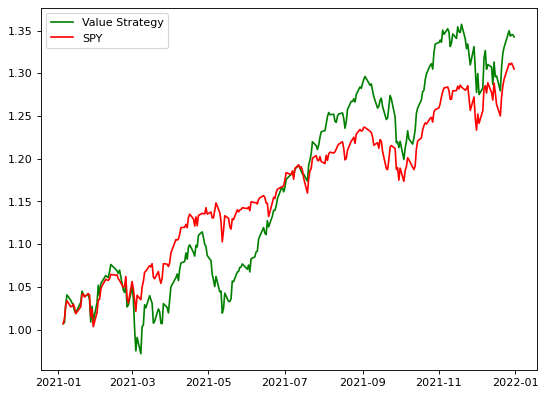

In [26]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cum_ret_value, color='green', label='Value Strategy')
plt.plot(SPY_cum_ret['Adj Close'], color='red', label='SPY')
plt.legend()
plt.show()

We can see that our portfolio built from value strategy aligns quite closely with the SPDR S&P 500 trust!

## Conclusion

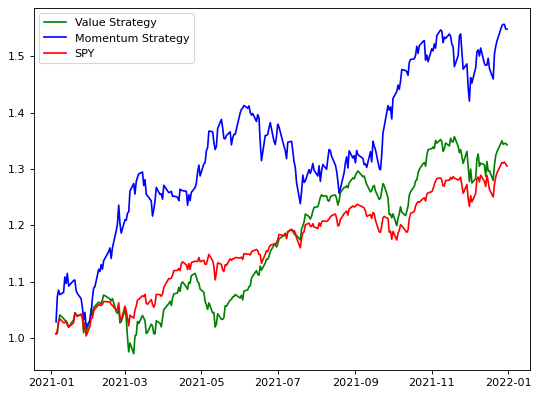

In [27]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cum_ret_value, color='green', label='Value Strategy')
plt.plot(cum_ret_momentum, color='blue', label='Momentum Strategy')
plt.plot(SPY_cum_ret['Adj Close'], color='red', label='SPY')
plt.legend()
plt.show()